# ML-ZC Homework 1


In [93]:
pip install numpy pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import requests

url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv"
response = requests.get(url)

with open('laptops.csv', 'wb') as file:
    file.write(response.content)

# Load the CSV file into a DataFrame
file_path = '/Users/sebastianreyes/Documents/3 Carrera/Proyectos/Portafolio/machinelearning/laptops.csv'  # Replace with your actual file path
laptops_data = pd.read_csv(file_path)

# Q1. Pandas version

In [94]:
import pandas as pd
print(pd.__version__)

2.0.3


# Q2. Records count


In [15]:
number_of_records = laptops_data.shape[0]
print("Number of records:", number_of_records)

Number of records: 2160


# Q3. Laptop brands

In [20]:
# Count unique values in the 'Brand' column and show each unique value with its count
unique_brands_count = laptops_data['Brand'].value_counts()

# Displaying the unique values and their counts
print("Unique brands and their counts:\n", unique_brands_count)

# Count of unique brands
total_unique_brands = unique_brands_count.count()
print("\nTotal number of unique brands:", total_unique_brands)

Unique brands and their counts:
 Brand
Asus                415
HP                  368
Lenovo              366
MSI                 308
Acer                137
Apple               116
Dell                 84
Microsoft            77
Gigabyte             48
Razer                37
Medion               32
LG                   32
Alurin               29
PcCom                24
Samsung              22
Dynabook Toshiba     19
Vant                 11
Primux                8
Deep Gaming           8
Innjoo                6
Thomson               4
Prixton               3
Millenium             2
Denver                1
Jetwing               1
Realme                1
Toshiba               1
Name: count, dtype: int64

Total number of unique brands: 27


# Q4. Missing values

In [35]:
# Count missing values in each column
missing_values_count = laptops_data.isnull().sum()
print("Missing values in each column:\n", missing_values_count)

# Total count of missing values in the entire DataFrame
total_missing_values = laptops_data.isnull().sum().sum()
print("Total missing values in the DataFrame:", total_missing_values)


Missing values in each column:
 Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
Storage type      42
GPU             1371
Screen             4
Touch              0
Final Price        0
dtype: int64
Total missing values in the DataFrame: 1417


# Q5. Maximum final price

In [24]:
# Find the maximum value in the "Final Price" column
max_final_price = laptops_data['Final Price'].max()

print("Maximum Final Price:", max_final_price)

# Filter the DataFrame for the brand "Dell"
dell_laptops = laptops_data[laptops_data['Brand'] == 'Dell']

# Find the maximum value in the "Final Price" column for Dell laptops
max_final_price_dell = dell_laptops['Final Price'].max()

print("Maximum Final Price for Dell laptops:", max_final_price_dell)

Maximum Final Price: 7150.47
Maximum Final Price for Dell laptops: 3936.0


# Q6. Median value of Screen

In [61]:
# 1. Find the median value of the "Screen" column
median_screen = laptops_data['Screen'].median()
print("Median value of Screen:", median_screen)

# 2. Calculate the frequency of each value in the "Screen" column, including NA values
screen_frequency = laptops_data['Screen'].value_counts(dropna=False)
print("\nFrequency of each value in Screen (including NA):\n", screen_frequency)

# 3. Fill missing values in the "Screen" column with the most frequent value
laptops_data['Screen'].fillna(most_frequent_screen, inplace=True)



Median value of Screen: 15.6

Frequency of each value in Screen (including NA):
 Screen
15.60    1009
14.00     392
16.00     174
17.30     161
13.30     131
16.10      48
17.00      33
13.00      27
15.00      21
13.40      19
13.50      19
11.60      16
14.20      14
12.30      13
14.10      11
13.60      11
16.20      10
15.30       8
10.50       7
14.40       6
12.40       6
15.40       5
NaN         4
12.00       4
14.50       3
18.00       3
13.90       2
12.50       1
10.10       1
10.95       1
Name: count, dtype: int64


In [62]:
# 4. Find the median value of the "Screen" column again
median_screen = laptops_data['Screen'].median()
print("Median value of Screen:", median_screen)

# Calculate the frequency of each value in the "Screen" column, including NA values
screen_frequency = laptops_data['Screen'].value_counts(dropna=False)
print("\nFrequency of each value in Screen (including NA):\n", screen_frequency)

Median value of Screen: 15.6

Frequency of each value in Screen (including NA):
 Screen
15.60    1013
14.00     392
16.00     174
17.30     161
13.30     131
16.10      48
17.00      33
13.00      27
15.00      21
13.50      19
13.40      19
11.60      16
14.20      14
12.30      13
14.10      11
13.60      11
16.20      10
15.30       8
10.50       7
14.40       6
12.40       6
15.40       5
12.00       4
18.00       3
14.50       3
13.90       2
12.50       1
10.10       1
10.95       1
Name: count, dtype: int64


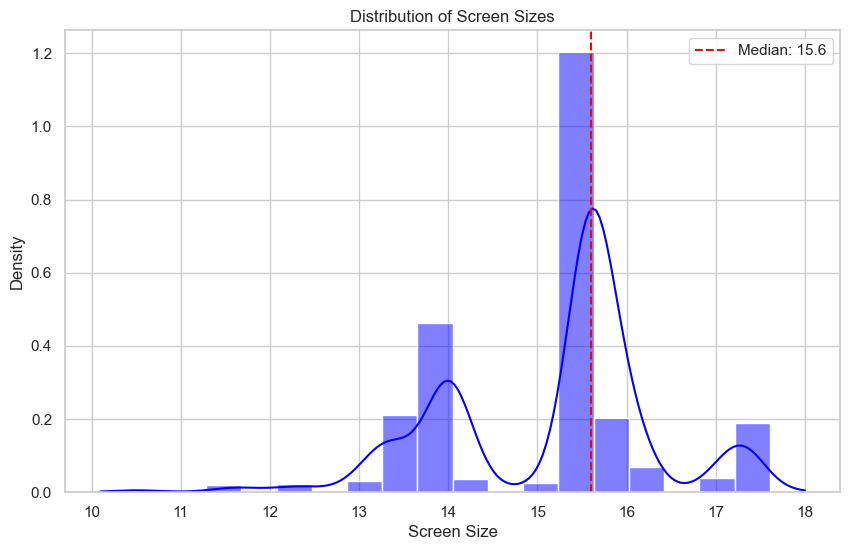

In [63]:

# Set the style of seaborn
sns.set(style="whitegrid")

# Calculate the median value of the "Screen" column
median_screen = laptops_data['Screen'].median()

# Plotting the distribution of the "Screen" column
plt.figure(figsize=(10, 6))
sns.histplot(laptops_data['Screen'], bins=20, kde=True, color='blue', stat='density')

# Add a vertical line for the median
plt.axvline(median_screen, color='red', linestyle='--', label=f'Median: {median_screen}')

# Adding titles and labels
plt.title('Distribution of Screen Sizes')
plt.xlabel('Screen Size')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

# Q7. Sum of weights

In [92]:

# Select all "Innjoo" laptops and only relevant columns
X_df = laptops_data[laptops_data['Brand'] == 'Innjoo'][['RAM', 'Storage', 'Screen']]

# Convert selected columns to numeric, coercing errors to NaN
X_df['RAM'] = pd.to_numeric(X_df['RAM'], errors='coerce')
X_df['Storage'] = pd.to_numeric(X_df['Storage'], errors='coerce')
X_df['Screen'] = pd.to_numeric(X_df['Screen'], errors='coerce')

# Drop rows with NaN values
X_df = X_df.dropna()

# Convert the DataFrame to a NumPy array
X = X_df.to_numpy()

# Check if the resulting X array has enough rows
if X.size == 0 or X.shape[0] < 2:  # Check size of the array
    print("Not enough data to perform matrix operations.")
else:
    # Compute the transpose of X
    X_T = X.T

    # Compute XTX (X_T * X)
    XTX = np.dot(X_T, X)

    # Compute the inverse of XTX
    try:
        XTX_inv = np.linalg.inv(XTX)
    except np.linalg.LinAlgError:
        print("Matrix is singular and cannot be inverted.")
        XTX_inv = None

    if XTX_inv is not None:
        # Create an array y with specified values
        y = np.array([1100, 1300, 800, 900, 1000, 1100])

        # Multiply the inverse of XTX with the transpose of X and then by y
        w = np.dot(XTX_inv, np.dot(X_T, y))

        # Display the result w
        print("Result w:\n", w)

        # Sum all the results in w
        sum_w = np.sum(w)
        print("Sum of results w:", sum_w)

Result w:
 [45.58076606  0.42783519 45.29127938]
Sum of results w: 91.29988062995636
